## Factors That Impact the Outcomes of Gun Violence



Our project is to study a data set based on gun incidents in the United States, looking at different variables such as gender, location, t he amount injured, the amount killed, amount of guns per incident, time, and age group.

Our hypothesis is when there are a larger number of guns involved in an incident, the greater number of people who will be killed.



In [56]:
import numpy as np
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import copy

In [72]:
# functions


def age_Sorter(Row):
    temp = Row['participant_age_group']
    if str(temp) == 'nan':
        return Row
    age_group = temp.split("||")
    if len(age_group) == 1:
        age_group = age_group[0].split("|")
    for age in age_group:
        a = age.split("::")
        if len(a) == 1:
            a = a[0].split(":")
        if a[1] == "Adult 18+":
            Row['Adult'] += 1
        elif a[1] == "Teen 12-17":
            Row['Teen'] += 1
        else:
            Row['Child'] += 1
    return Row


def gender_Sorter(Row):
    temp = Row['participant_gender']
    if str(temp) == 'nan':
        return Row
    gender = temp.split("||")
    if len(gender) == 1:
        gender = gender[0].split("|")
    for gen in gender:
        g = gen.split("::")
        if len(g) == 1:
            g = g[0].split(":")
        if g[1] == "Male":
            Row['Male'] += 1
        elif g[1] == "Female":
            Row['Female'] += 1
    return Row



def role_Sorter(Row):
    temp = Row['participant_type']
    if str(temp) == 'nan':
        return Row
    role = temp.split("||")
    if len(role) == 1:
        role = role[0].split("|")
    for ro in role:
        r = ro.split("::")
        if len(r) == 1:
            r = r[0].split(":")
        if r[1] == "Subject-Suspect":
            Row['Perpetrators'] += 1
        elif r[1] == "Victim":
            Row['Victims'] += 1
    return Row



## Average amount of Guns in incidents with guns per state



Our project observes a dataset 2013\-2022, which contains recorded information on incidents of guns in the United States. In this case we are looking at the amount of people killed or injured, and amount of guns involved every incident per state.

We also calculated the total amount of incidents per state and average amount of Guns per incident by counting the mentions of each state in the original dataset for the amount of incidents, and dividing the amount of guns involved in ever incident per state
by the number of incidents.



In [3]:
# add state code to states
violence_data = pd.read_csv("gun-violence-data.csv")

states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME','Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
violence_data['state code'] = violence_data['state'].apply(lambda x : states[x])
ViolenceChart = violence_data.groupby('state code')[['n_killed', 'n_guns_involved','n_injured']].sum().sort_values(by = "n_killed",ascending = False).reset_index().head(50)

In [4]:
Sinstance = violence_data['state code'].value_counts()
Sinstance = pd.DataFrame(Sinstance)

Sinstance = Sinstance.reset_index()

Sinstance.columns = ['state code','num_incident']
ViolenceChart = pd.merge(ViolenceChart,Sinstance,on = "state code")

In [5]:
ViolenceChart['Average GPI'] = ViolenceChart['num_incident']/ViolenceChart['n_guns_involved']

This Pie chart shows the percentage of all guns in incidents were used per state, and the average amount of guns used per incident for each state, which was found by deviding the amount of incidents for each state, by the amount of guns used in all the incidents for that state. This allows for us to know which states have the most amount of guns used in gun insidentses.



In [6]:
fig = px.pie(ViolenceChart, values= 'Average GPI', names='state code', title= "Percentage of all guns in incidents used per state:")
fig.show()

This graph expresses the total amount of people killed by gun incidents between states, the closer to green the color is the more people that have been killed in that state.



In [7]:
fig = px.choropleth(ViolenceChart, locations='state code', locationmode="USA-states", color='n_killed', scope="usa", color_continuous_scale="delta", title="Number of people killed in gun incidents across each state")
fig.show()

This graph expresses the total amount of people killed by gun incidents between states, the closer to green the color is the more people that have been killed in that state.

In [8]:
fig = px.choropleth(ViolenceChart, locations='state code', locationmode="USA-states", color='n_injured', scope="usa", color_continuous_scale="delta", title="Number of people injured in gun incidents across each state")
fig.show()

This graph show what words are most used when describing individual gun instances for the state that has been selected by the user.



Please Type a State's initials: CA

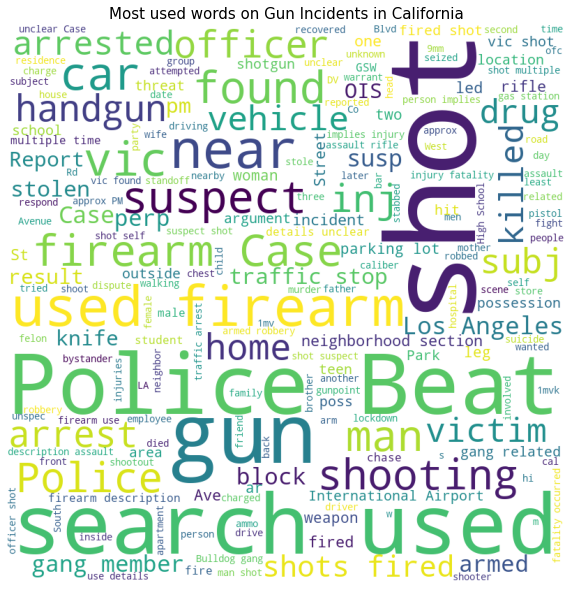

In [9]:
WCI = input("Please Type a State's initials:")
words = ' '.join(i for i in violence_data[violence_data['state code'] == WCI]['notes'].str.split(expand=True).stack().values.tolist())
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
WCIstateN = [key for key in states.items() if key[1] == WCI][0][0]

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most used words on Gun Incidents in " + WCIstateN, fontsize=15)
plt.tight_layout(pad = 0) 
plt.show()

### **The correlation between the number of adults and the number of guns used in an incident.**



We first clean through the data seperating age groups, gender and roles to easily analyze.  Using several functions we are able to plot each instance on a bubble plot to Analyze.  



In [80]:
gun_data_edited = pd.read_csv("gun-violence-data.csv")
columns_drop = ["incident_url", "source_url", "incident_url_fields_missing", "address", "participant_status", "sources", "latitude", "longitude", "state_house_district", "state_senate_district", "incident_id", "participant_name", "notes","location_description","congressional_district"]

gun_data_edited.drop(columns_drop, axis=1, inplace = True)
gun_data_edited.dropna(inplace=True)
gun_data_edited.reset_index(drop=True, inplace=True)


gun_data_edited['Adult'] = 0
gun_data_edited['Teen'] = 0
gun_data_edited['Child'] = 0
gun_data_edited['Male'] = 0
gun_data_edited['Female'] = 0
gun_data_edited['Victims'] = 0
gun_data_edited['Perpetrators'] = 0

gun_data_edited = gun_data_edited.apply(age_Sorter, axis = 1)
gun_data_edited = gun_data_edited.apply(gender_Sorter, axis = 1)
gun_data_edited = gun_data_edited.apply(role_Sorter, axis = 1)

The graph below contains many axses however, the most important ones are the x axsis and size of each bubble.  The bigger an individual bubble is the more guns were involved at that event.  Using this data we can see that as there are less Adults are involved there are more guns utilized.  



In [86]:
fig = px.scatter(gun_data_edited, x="Adult", y="Victims",
	         size="n_guns_involved", color="Perpetrators",
                 hover_name="n_guns_involved", log_x=True, size_max=60)
fig.show()

This scatter plot also shows the negative relationship and that as less adults are included the number of guns decreases.



In [89]:
gunData = px.scatter(gun_data_edited, x="Adult", y="n_guns_involved")
gunData.show()

Lastly we should check to see if any other age groups offer a solution.  However both groups show a smilair instance in which the less teens there are the more guns they will use.  



In [87]:
gunDataOne = px.scatter(gun_data_edited, x="Teen", y="n_guns_involved")
gunDataOne.show()

In [88]:
gunDataTwo = px.scatter(gun_data_edited, x="Child", y="n_guns_involved")
gunDataTwo.show()

In conclusion, I have examained all relationships between age group and number of guns used.  The opposite is true showing that with less participants more weapons are used to commit these attrocities.  This data shows that although adults are able to legally purchase weapons in many states, they are choosing to not use an excess amount of guns in a group.  



### When large groups of teens or adults are together and someone has a gun, there is a possibility that more individuals can get injured or killed.



This has been represented below in these two scatter plots that detail how many teens/adults can be injured or killed in such an incident.



In [82]:
gun_relation = pd.read_csv("gun-violence-data.csv")

columns_drop = ["incident_url", "source_url", "incident_url_fields_missing", "address", "participant_status", "sources", "latitude", "longitude", "state_house_district", "state_senate_district", "incident_id", "participant_name", "notes","location_description","congressional_district"]

gun_relation.drop(columns_drop, axis=1, inplace = True)
#gun_relation.dropna(inplace=True)
gun_relation.reset_index(drop=True, inplace=True)

gun_relation['Adult'] = 0
gun_relation['Teen'] = 0
gun_relation['Child'] = 0

gun_relation = gun_relation.apply(age_Sorter, axis = 1)

In [83]:
teen_shooting = px.scatter(gun_relation[gun_relation['state'] == "California"], x='n_killed', y='Teen', size = "n_injured", title = "Teen Injury/Death Rates")
teen_shooting.show()

This data above show's the injury and death in individual shootings where teens were invloved.



In [85]:
adult_shooting_injury = px.scatter(gun_relation[gun_relation['state'] == "California"], x='n_injured', y='Adult', size = "n_killed", title = "Adult Injury/Death Rates")
adult_shooting_injury.show()

The data shown above shows the amount of adults involved in shootings and how many were injured or killed in these events.



As shown in the data represented above, When a higher concentration of people are in a location with a gun, there is likely to be a shooting where people will get injured or even killed.

This data shown above is just in the state of California, where during the time period of 2018\-2021 had the highest shooting deaths throughout the U.S topping out at ~5,800.



### The Relationship Between Gender and State in Shootings



The data below shows that the number of participants varies by each state and gender. The severity also varies by gender. For example, the graph that represents the females only ranges from 0\-4000, and the largest amount of participants are in Texas. However, the graph that represents the males ranges from 0\-30,000, and the state with the largest amount of participants is Illinois.


In [67]:
gun_info = pd.read_csv("gun-violence-data.csv")
columns_drop = ["incident_url", "source_url", "incident_url_fields_missing", "address", "participant_status", "sources", "latitude", "longitude", "state_house_district", "state_senate_district", "incident_id", "participant_name", "notes", "location_description", "congressional_district"]

gun_info.drop(columns_drop, axis=1, inplace = True)
gun_info.reset_index(drop=True, inplace=True)
gun_info['Female'] = 0
gun_info['Male'] = 0
gun_info = gun_info.apply(gender_Sorter, axis=1)

In [69]:
gun_genders = gun_info.groupby('state')[['Female','Male']].sum().sort_values(by = "Female",ascending = False).reset_index()

In [70]:
fig = px.bar(gun_genders, x="state", y="Female", title = "Number of Female Participants by State")
fig.show()

In [71]:
fig = px.bar(gun_genders, x="state", y="Male", title = "Number of Male Participants by State")
fig.show()

### As the date gets closer \(to and fro\) to summertime, which is annually from June 22 to September 22, and specifically its midpoint, which is August 1st, more deaths from gun violence will occur.



We attempt to find any patterns over the years from 2013 to 2018. There is no correlation between a time period within each each year, such as a season, and the number of people killed, but over each year, the number of peopled killed increases.



In [22]:
gun_data = pd.read_csv("gun-violence-data.csv")
columns_drop = ["incident_url", "source_url", "incident_url_fields_missing", "address", "participant_status", "sources", "latitude", "longitude", "state_house_district", "state_senate_district", "incident_id", "participant_name", "notes","location_description","congressional_district", "gun_stolen", "gun_type", "incident_characteristics"]

gun_data.drop(columns_drop, axis=1, inplace = True)
gun_data.reset_index(drop=True, inplace=True)
gun_data["date"] = gun_data["date"].astype("datetime64")

In [23]:
# Code is provided by Dylan
gun_data_years = copy.deepcopy(gun_data)
gun_data_years['date'] = pd.to_datetime(gun_data_years['date'])
gun_data_years['year'] = gun_data_years['date'].dt.year
gun_data_years = gun_data_years.groupby('year')[['n_killed', 'n_guns_involved', 'n_injured']].sum().sort_values(by = "year",ascending = True).reset_index().head(50)
gun_data_years.set_index("year",inplace=True, drop=True)
gun_data_years.drop(labels=[2013, 2018], axis = 0, inplace=True)
gun_data_years

,n_killed,n_guns_involved,n_injured
year,,,
2014,12557,7927.0,23002
2015,13484,36849.0,26967
2016,15066,53821.0,30580
2017,15511,76189.0,30703


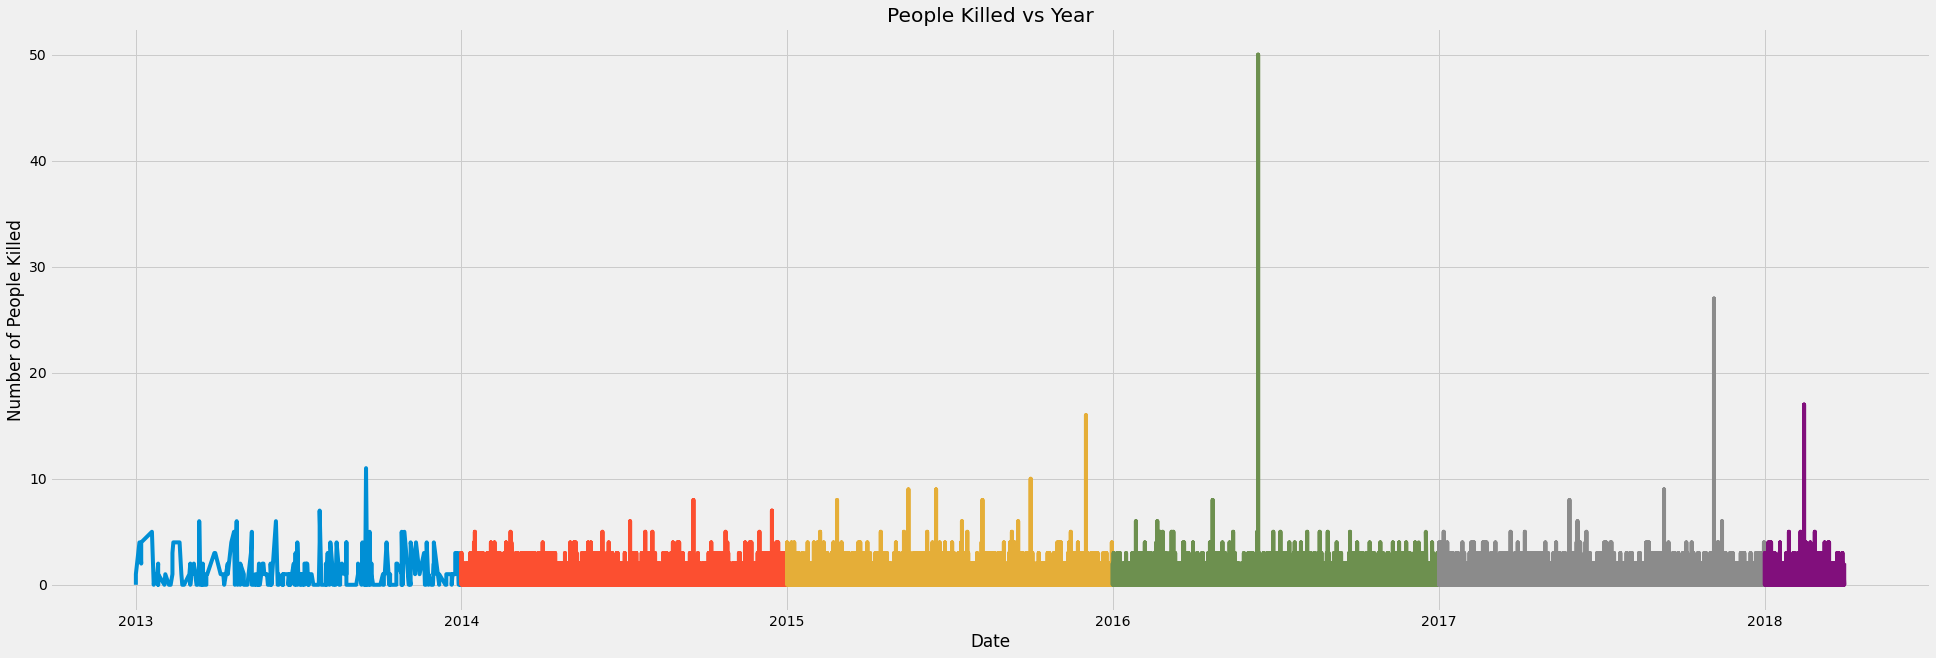

In [24]:
gun_data_years = copy.deepcopy(gun_data)
gun_data_years['date'] = pd.to_datetime(gun_data_years['date'])
gun_data_years['year'] = gun_data_years['date'].dt.year
gun_data_years = gun_data_years.set_index("date")
gun_data_2013 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2013])
gun_data_2014 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2014])
gun_data_2015 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2015])
gun_data_2016 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2016])
gun_data_2017 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2017])
gun_data_2018 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2018])
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
plt.xlabel("Date")
plt.ylabel("Number of People Killed")
plt.title("People Killed vs Year")
plt.plot(gun_data_2013["n_killed"])
plt.plot(gun_data_2014["n_killed"])
plt.plot(gun_data_2015["n_killed"])
plt.plot(gun_data_2016["n_killed"])
plt.plot(gun_data_2017["n_killed"])
plt.plot(gun_data_2018["n_killed"])

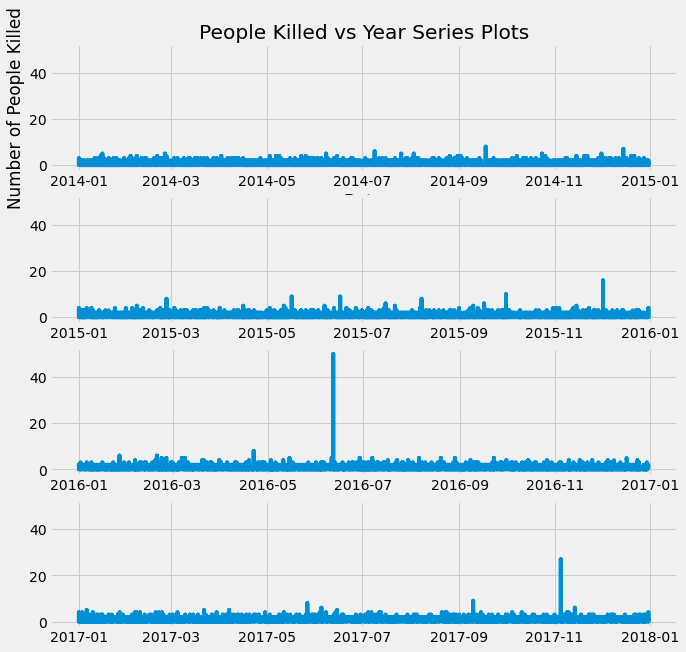

In [25]:
gun_data_years = copy.deepcopy(gun_data)
gun_data_years['date'] = pd.to_datetime(gun_data_years['date'])
gun_data_years['year'] = gun_data_years['date'].dt.year
gun_data_years = gun_data_years.set_index("date")
gun_data_2013 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2013])
gun_data_2014 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2014])
gun_data_2015 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2015])
gun_data_2016 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2016])
gun_data_2017 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2017])
gun_data_2018 = copy.deepcopy(gun_data_years[gun_data_years['year'] == 2018])
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 10))
b=plt.subplot(4,1,1)
plt.title("People Killed vs Year Series Plots")
b.set_xlabel('Date')
plt.plot(gun_data_2014["n_killed"])
c=plt.subplot(4,1,2, sharey=b)
plt.plot(gun_data_2015["n_killed"])
d=plt.subplot(4,1,3, sharey=c)
plt.plot(gun_data_2016["n_killed"])
e=plt.subplot(4,1,4, sharey=d)
plt.plot(gun_data_2017["n_killed"])
b.set_ylabel('Number of People Killed');

In [26]:
# Code is provided by Dylan
gun_data_years = copy.deepcopy(gun_data)
gun_data_years['date'] = pd.to_datetime(gun_data_years['date'])
gun_data_years['year'] = gun_data_years['date'].dt.year
gun_data_years = gun_data_years.groupby('year')[['n_killed', 'n_guns_involved','n_injured']].sum().sort_values(by = "year",ascending = True).reset_index().head(50)
gun_data_years.set_index("year",inplace=True, drop=True)
gun_data_years.drop(labels=[2013, 2018], axis = 0, inplace=True)
gun_data_years

,n_killed,n_guns_involved,n_injured
year,,,
2014,12557,7927.0,23002
2015,13484,36849.0,26967
2016,15066,53821.0,30580
2017,15511,76189.0,30703


From the table between year versus the number of people killed, the number of people injured, and the number of guns involved, the proxy of number of people killed connects with both the number of people injured and the number of guns involved, offering a means of measuring gun violence. This chart highlights that as the year increases, the number of people both killed or injured increases. This corresponds with an increase in spikes, or mass shootings, such as the Orlando Night Club shooting \(June 12th 2016\).

The first graph between year and number of people killed shows that the mean number of people killed remains steady. It also shows that the years of 2013 and 2018 hold incomplete data. Building off of these observations, the following graph between separated graphs of each year only from 2014 to 2017 versus number of people killed shows no correlation between specific seasons of the year and the number of people killed.



### Conclusion



Our data shows that our hypothesis was correct. This means that as the number of guns increase, more people will die. We found the correlation between the season and gun violence is statistically insignificant but there is a slight increase in gun violence every year.

